In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
heart_raw = pd.read_csv('heart.csv')
heart_raw

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
heart_raw.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [259]:
# Check Missing Data
missing_data = heart_raw.isnull()
missing_data.sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [249]:
heart_features = heart_raw.copy()
heart_features = heart_features.drop(['HeartDisease'], axis=1)
targets = heart_raw['HeartDisease']

In [250]:
heart_features

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [256]:
heart_features['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [7]:
targets

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

## Dummy variables, Feature Scaling

In [8]:
heart_features = pd.get_dummies(heart_features, drop_first=True)
heart_features

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,False,True,False,False,False,False,False,True,False


In [9]:
scaler = StandardScaler()
heart_features_scaled = scaler.fit_transform(heart_features)
heart_features_scaled

array([[-1.4331398 ,  0.41090889,  0.82507026, ..., -0.8235563 ,
        -1.00218103,  1.15067399],
       [-0.47848359,  1.49175234, -0.17196105, ..., -0.8235563 ,
         0.99782372, -0.86905588],
       [-1.75135854, -0.12951283,  0.7701878 , ..., -0.8235563 ,
        -1.00218103,  1.15067399],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, ...,  1.21424608,
         0.99782372, -0.86905588],
       [ 0.37009972, -0.12951283,  0.34027522, ..., -0.8235563 ,
         0.99782372, -0.86905588],
       [-1.64528563,  0.30282455, -0.21769643, ..., -0.8235563 ,
        -1.00218103,  1.15067399]])

## Split Dataset

In [10]:
x_train, x_temp, y_train, y_temp = train_test_split(heart_features_scaled, targets, test_size=0.2, random_state=42)

x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


In [11]:
# Check balancing
print(np.sum(y_train), len(y_train), np.sum(y_train) / len(y_train))
print(np.sum(y_valid), len(y_valid), np.sum(y_valid) / len(y_valid))
print(np.sum(y_test), len(y_test), np.sum(y_test) / len(y_test))

401 734 0.5463215258855586
59 92 0.6413043478260869
48 92 0.5217391304347826


In [12]:
print(x_train.shape)

print(y_train.shape)

print(x_valid.shape)

print(y_valid.shape)

print(x_test.shape)

print(y_test.shape)

(734, 15)
(734,)
(92, 15)
(92,)
(92, 15)
(92,)


## Model

In [118]:
results_list = []

In [240]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

config = {
    'layey_num': 2,
    'input_size': 15,
    'output_size': 1,
    'hidden_layer_size': 80,
    'batch_size': 64,
    'epoch_size': 200,
    'learning_rate': 0.00003,
}

input_layer = Input(shape=(config['input_size'],))

hidden_layer1 = Dense(config['hidden_layer_size'], activation='relu', 
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(input_layer)

hidden_layer2 = Dense(config['hidden_layer_size'], activation='relu', 
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(hidden_layer1)

output_layer = Dense(config['output_size'], activation='sigmoid')(hidden_layer2)

model = Model(inputs=input_layer, outputs=output_layer)

custom_optimizer = Adam(learning_rate=config['learning_rate'])
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])


## Training

In [241]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
        x_train,
        y_train,
        batch_size=config['batch_size'],
        epochs=config['epoch_size'],
        validation_data=(x_valid, y_valid),
        verbose=2,
        callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/200
12/12 - 0s - 38ms/step - accuracy: 0.3869 - loss: 0.8523 - val_accuracy: 0.4130 - val_loss: 0.8311 - learning_rate: 3.0000e-05
Epoch 2/200
12/12 - 0s - 2ms/step - accuracy: 0.4251 - loss: 0.8429 - val_accuracy: 0.4348 - val_loss: 0.8232 - learning_rate: 3.0000e-05
Epoch 3/200
12/12 - 0s - 2ms/step - accuracy: 0.4496 - loss: 0.8338 - val_accuracy: 0.4674 - val_loss: 0.8154 - learning_rate: 3.0000e-05
Epoch 4/200
12/12 - 0s - 2ms/step - accuracy: 0.4796 - loss: 0.8248 - val_accuracy: 0.5217 - val_loss: 0.8079 - learning_rate: 3.0000e-05
Epoch 5/200
12/12 - 0s - 2ms/step - accuracy: 0.5109 - loss: 0.8164 - val_accuracy: 0.5326 - val_loss: 0.8006 - learning_rate: 3.0000e-05
Epoch 6/200
12/12 - 0s - 2ms/step - accuracy: 0.5313 - loss: 0.8079 - val_accuracy: 0.5870 - val_loss: 0.7932 - learning_rate: 3.0000e-05
Epoch 7/200
12/12 - 0s - 2ms/step - accuracy: 0.5504 - loss: 0.7998 - val_accuracy: 0.6196 - val_loss: 0.7862 - learning_rate: 3.0000e-05
Epoch 8/200
12/12 - 0s - 2ms/step

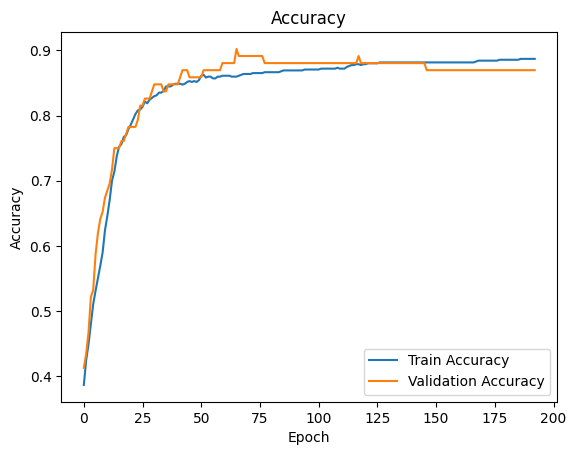

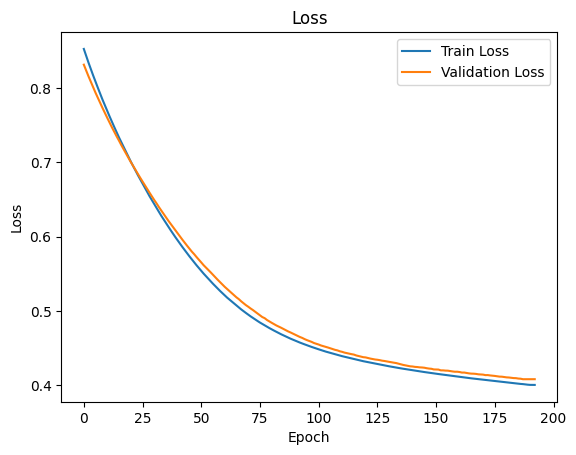

In [242]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Test

In [243]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8801 - loss: 0.4531  
Test loss: 0.45. Test accuracy: 86.96%


In [244]:
record = {
        'config': config,
        'train_accuracy': history.history['accuracy'][-1],
        'val_accuracy': history.history['val_accuracy'][-1],
        'test_accuracy': test_accuracy,
        'test_loss': test_loss
    }
results_list.append(record)

In [245]:
import json

with open('results.json', 'w') as f:
    json.dump(results_list, f, indent=4)


In [ ]:
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.width', 1000)      

df = pd.read_json('results.json')

max_accuracy = df['test_accuracy'].max()

highest_accuracy_indices = df[df['test_accuracy'] == max_accuracy]

print(highest_accuracy_indices)

NameError: name 'pd' is not defined